In [451]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [452]:
 #First Step

 df = pd.read_csv("SeoulBikeData.csv" , encoding = 'latin1')

In [453]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [454]:
df.dtypes

,0
Date,object
Rented Bike Count,int64
Hour,int64
Temperature(°C),float64
Humidity(%),int64
Wind speed (m/s),float64
Visibility (10m),int64
Dew point temperature(°C),float64
Solar Radiation (MJ/m2),float64
Rainfall(mm),float64


In [455]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [457]:
df.columns=['Date','Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'DPT',
       'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons',
       'Holiday', 'Functioning_Day']

In [458]:
df['Date'] = pd.to_datetime(df['Date'], format = 'mixed') #olası tarihsel işlemleri kolaylaştırmak için obje olan sütun tipimizi datetime veritipine dönüştürme işlemi
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year
df["Day_Name"] = df["Date"].dt.day_name()

In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               8760 non-null   datetime64[ns]
 1   Rented_Bike_Count  8760 non-null   int64         
 2   Hour               8760 non-null   int64         
 3   Temperature        8760 non-null   float64       
 4   Humidity           8760 non-null   int64         
 5   Wind_speed         8760 non-null   float64       
 6   Visibility         8760 non-null   int64         
 7   DPT                8760 non-null   float64       
 8   Solar_Radiation    8760 non-null   float64       
 9   Rainfall           8760 non-null   float64       
 10  Snowfall           8760 non-null   float64       
 11  Seasons            8760 non-null   object        
 12  Holiday            8760 non-null   object        
 13  Functioning_Day    8760 non-null   object        
 14  Day     

In [460]:
#checking is their any null value or not
df.isnull().sum()

,0
Date,0
Rented_Bike_Count,0
Hour,0
Temperature,0
Humidity,0
Wind_speed,0
Visibility,0
DPT,0
Solar_Radiation,0
Rainfall,0


<ipython-input-461-93c9b95f6f5b>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combineddf, x="Functioning_Day", y=i, ci=None)


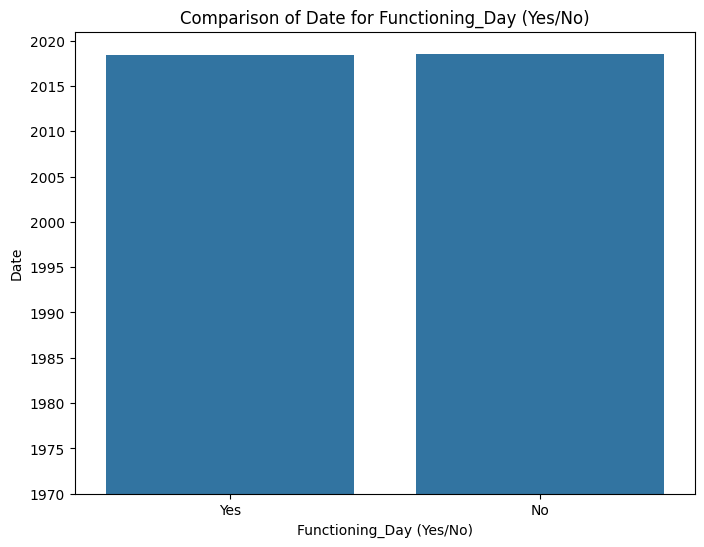

<ipython-input-461-93c9b95f6f5b>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combineddf, x="Functioning_Day", y=i, ci=None)


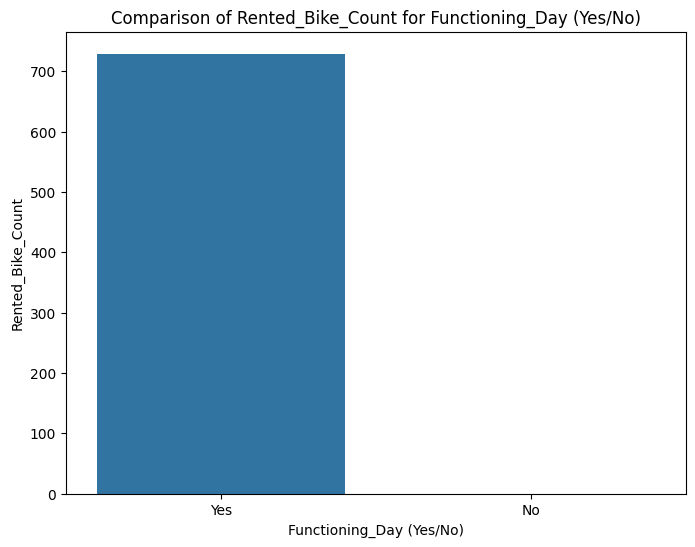

<ipython-input-461-93c9b95f6f5b>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combineddf, x="Functioning_Day", y=i, ci=None)


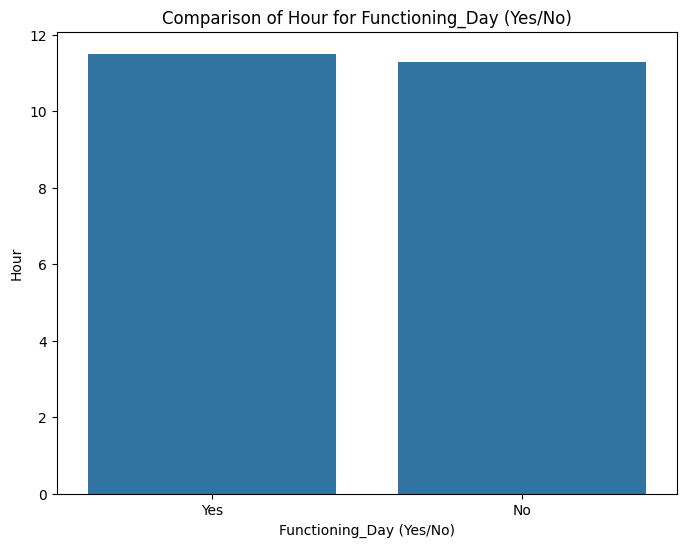

<ipython-input-461-93c9b95f6f5b>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combineddf, x="Functioning_Day", y=i, ci=None)


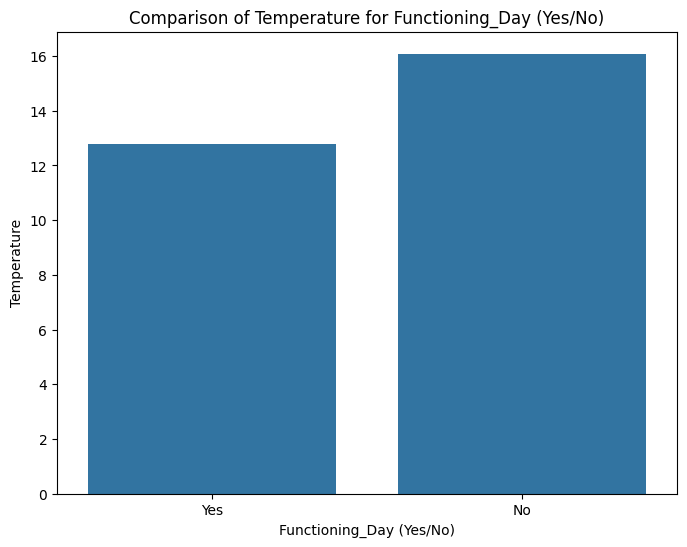

<ipython-input-461-93c9b95f6f5b>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combineddf, x="Functioning_Day", y=i, ci=None)


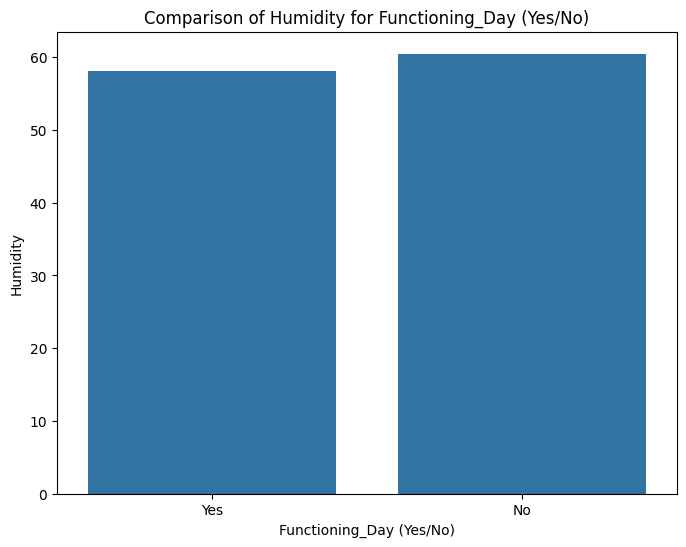

<ipython-input-461-93c9b95f6f5b>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combineddf, x="Functioning_Day", y=i, ci=None)


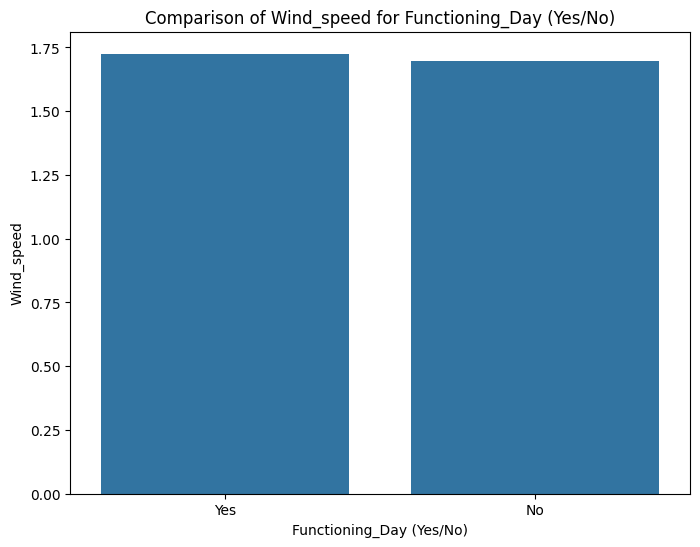

<ipython-input-461-93c9b95f6f5b>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combineddf, x="Functioning_Day", y=i, ci=None)


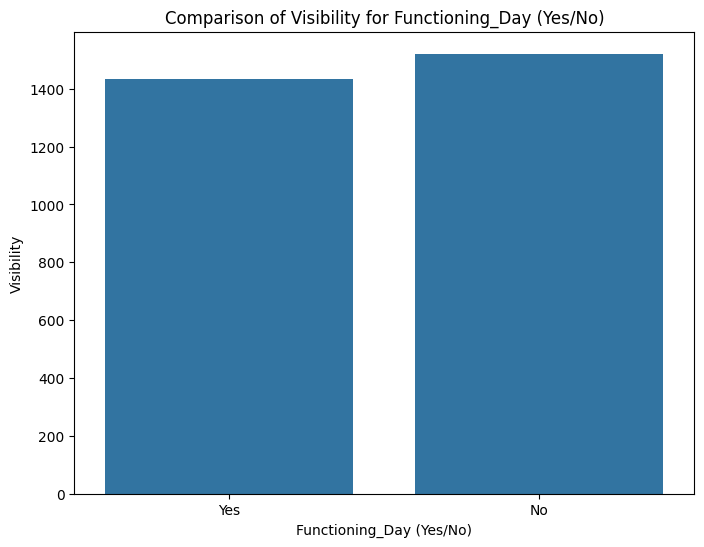

<ipython-input-461-93c9b95f6f5b>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combineddf, x="Functioning_Day", y=i, ci=None)


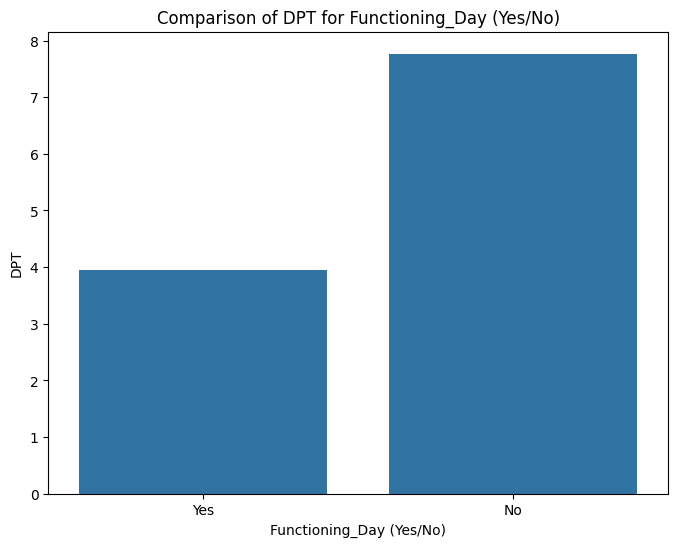

<ipython-input-461-93c9b95f6f5b>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combineddf, x="Functioning_Day", y=i, ci=None)


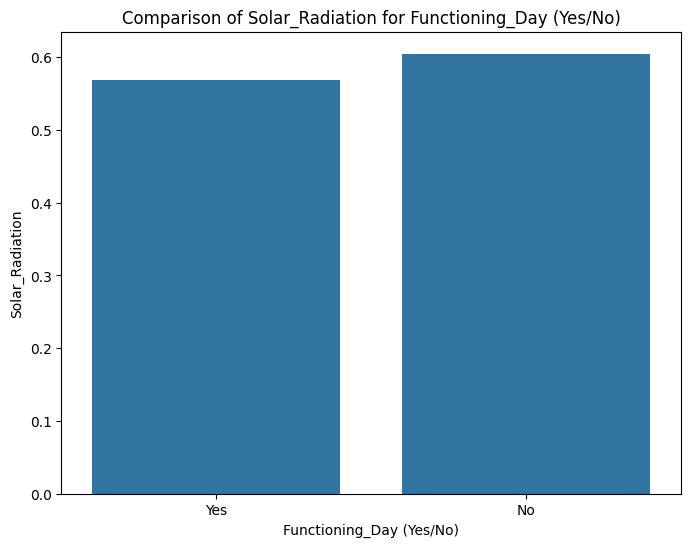

<ipython-input-461-93c9b95f6f5b>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combineddf, x="Functioning_Day", y=i, ci=None)


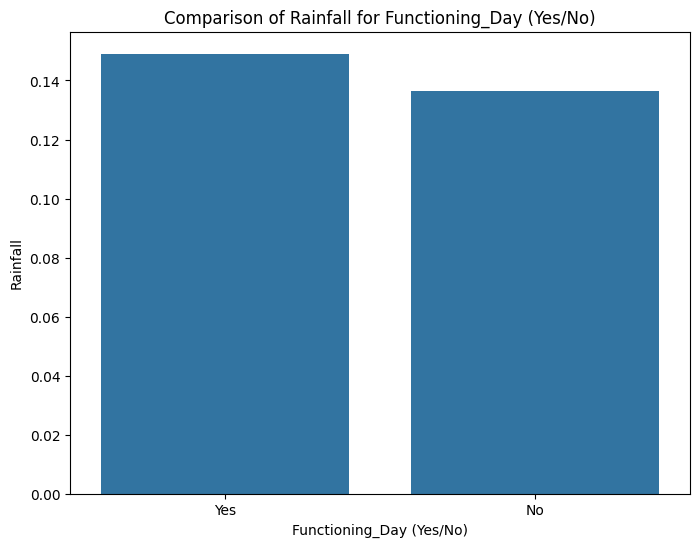

<ipython-input-461-93c9b95f6f5b>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combineddf, x="Functioning_Day", y=i, ci=None)


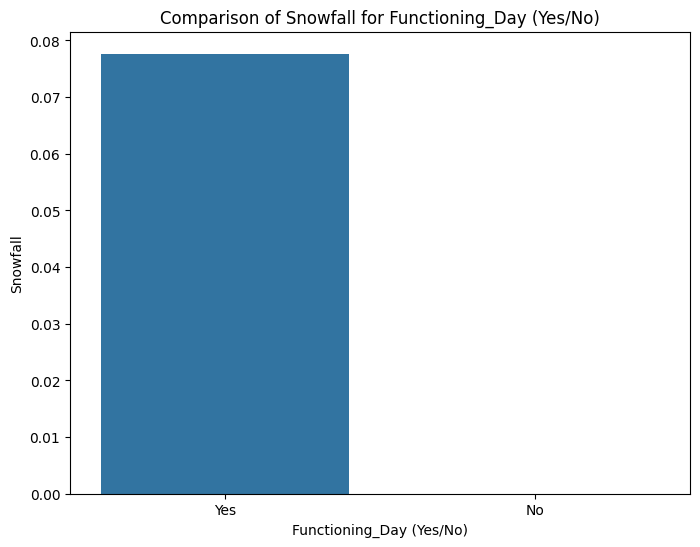

<ipython-input-461-93c9b95f6f5b>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combineddf, x="Functioning_Day", y=i, ci=None)


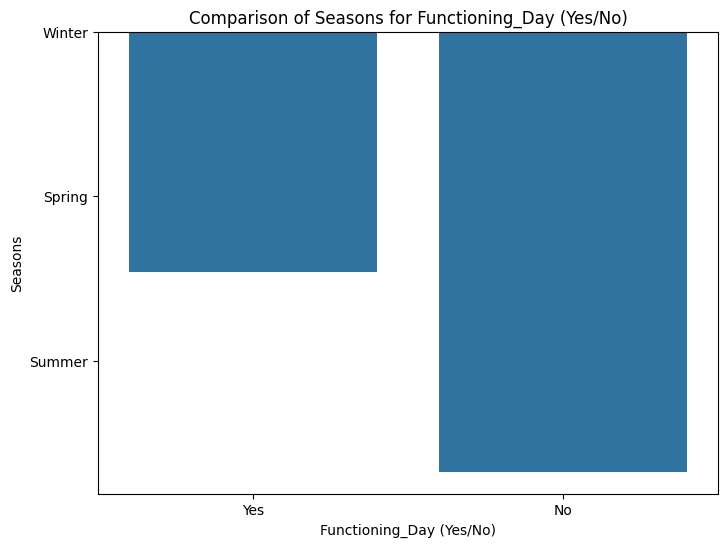

<ipython-input-461-93c9b95f6f5b>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combineddf, x="Functioning_Day", y=i, ci=None)


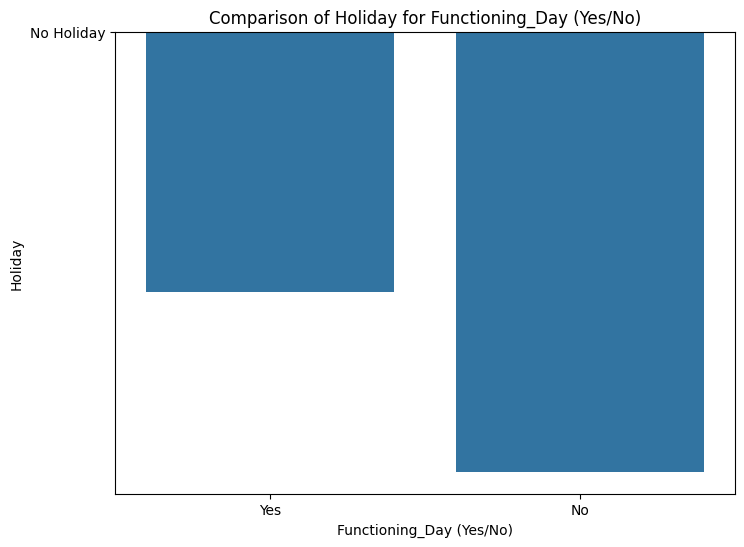

<ipython-input-461-93c9b95f6f5b>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combineddf, x="Functioning_Day", y=i, ci=None)


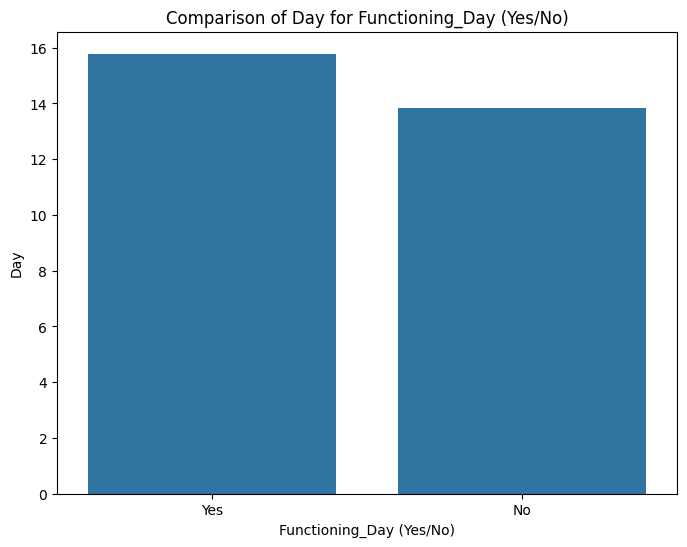

<ipython-input-461-93c9b95f6f5b>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combineddf, x="Functioning_Day", y=i, ci=None)


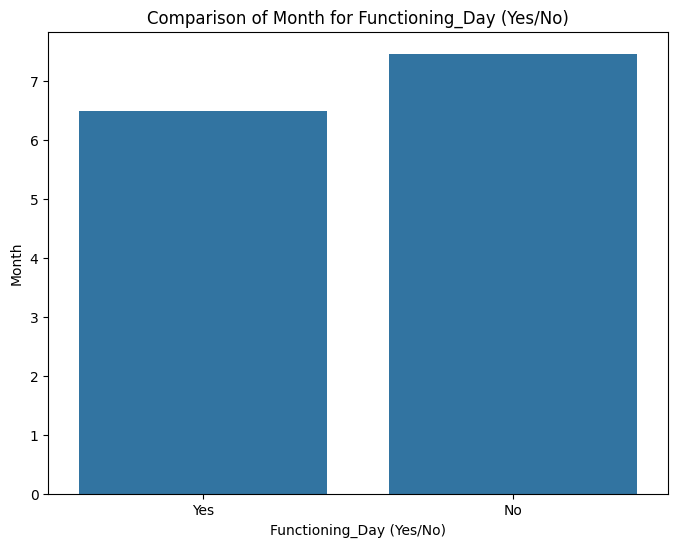

<ipython-input-461-93c9b95f6f5b>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combineddf, x="Functioning_Day", y=i, ci=None)


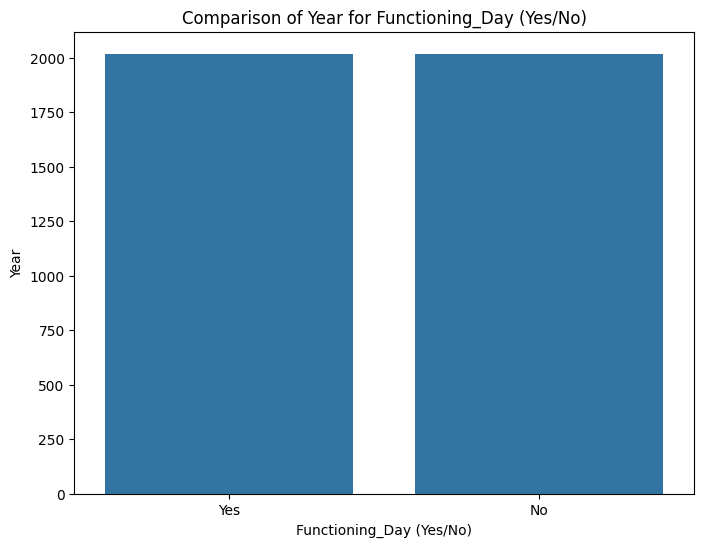

<ipython-input-461-93c9b95f6f5b>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combineddf, x="Functioning_Day", y=i, ci=None)


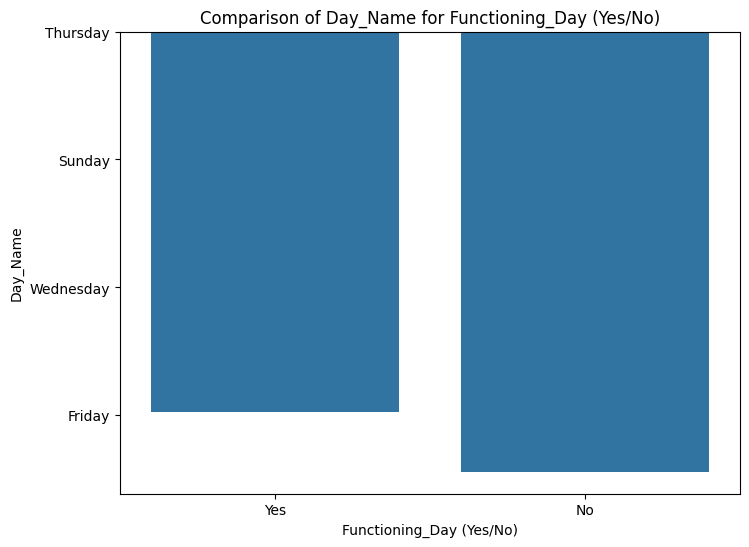

In [461]:
import seaborn as sns

for i in df.columns:
    if i == "Functioning_Day":  # "Functioning Day" zaten analizde
        continue
    column = [i, "Functioning_Day"]
    combineddf = df[column]

    # Kategorik çubuk grafiği
    plt.figure(figsize=(8, 6))
    sns.barplot(data=combineddf, x="Functioning_Day", y=i, ci=None)
    plt.title(f"Comparison of {i} for Functioning_Day (Yes/No)")
    plt.ylabel(i)
    plt.xlabel("Functioning_Day (Yes/No)")
    plt.show()


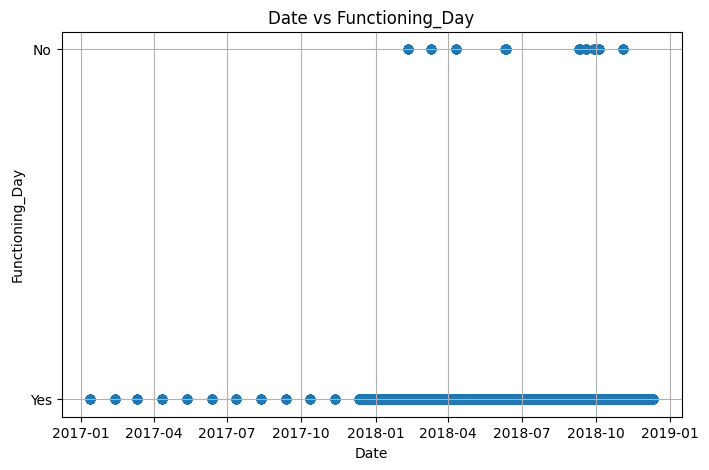

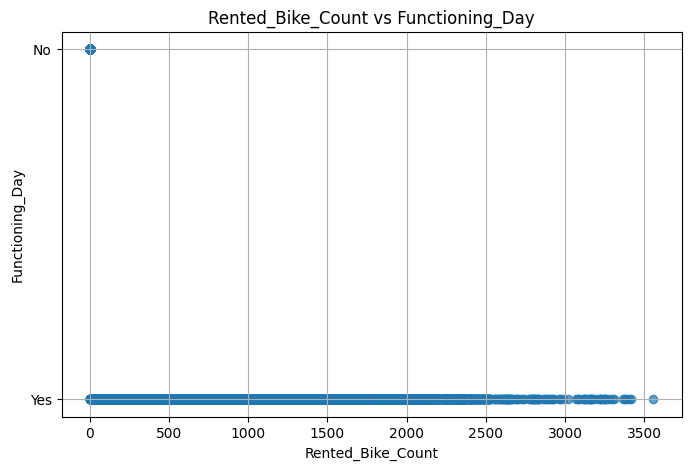

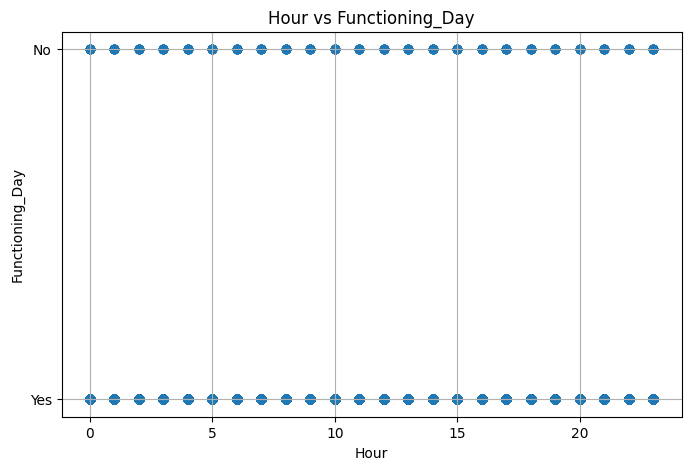

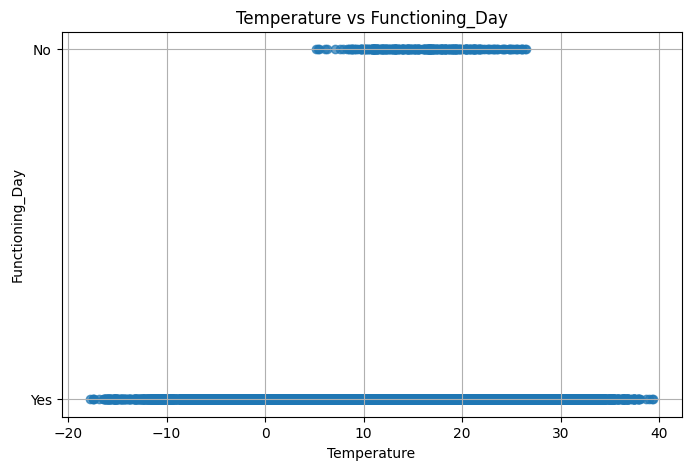

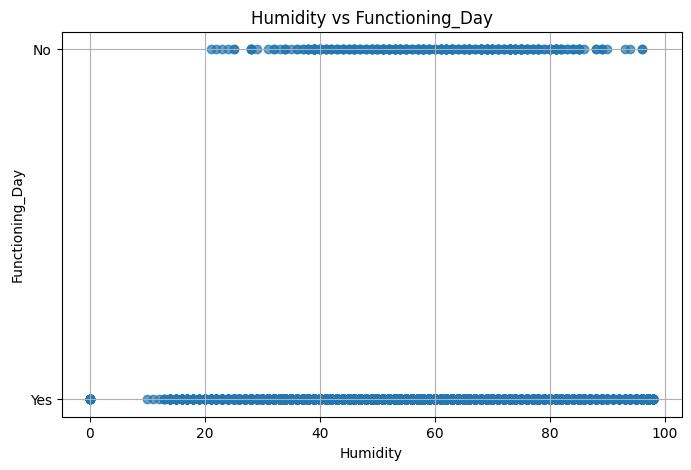

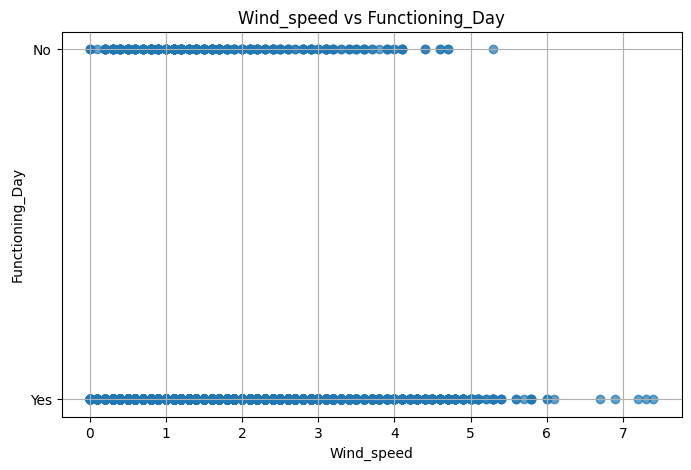

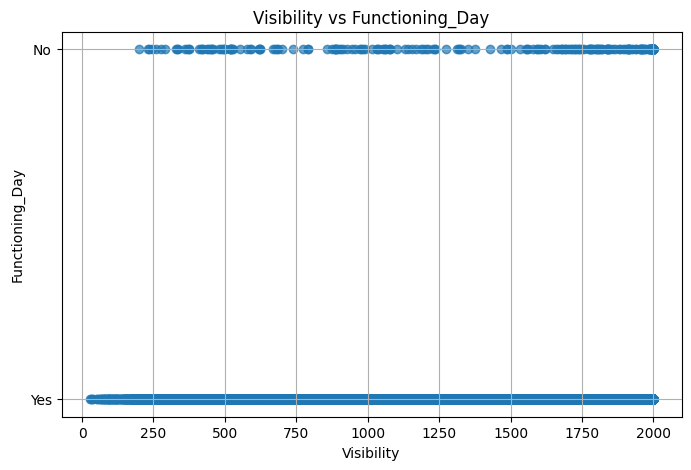

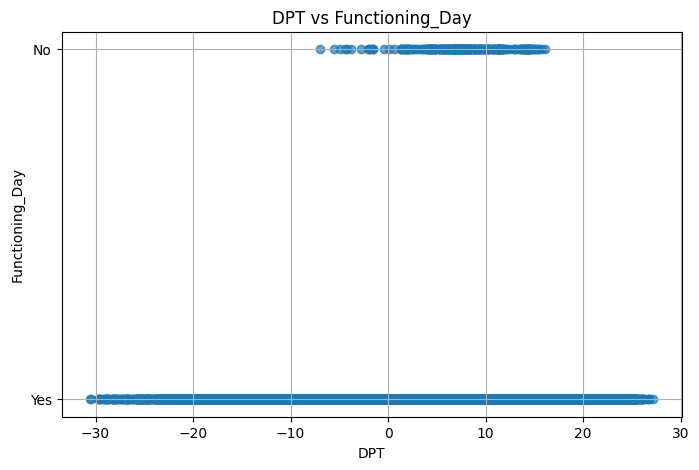

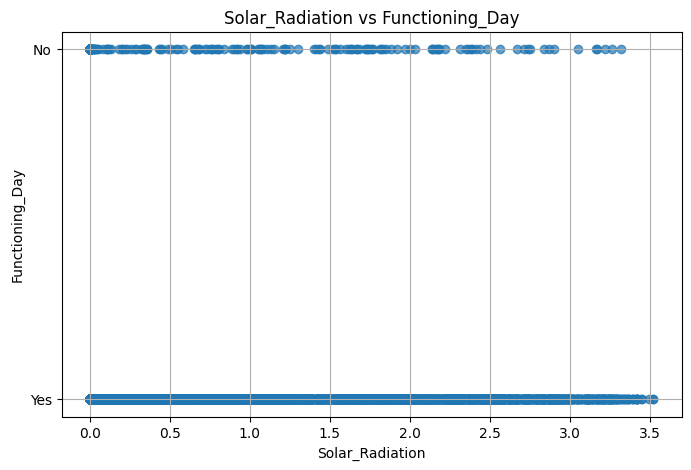

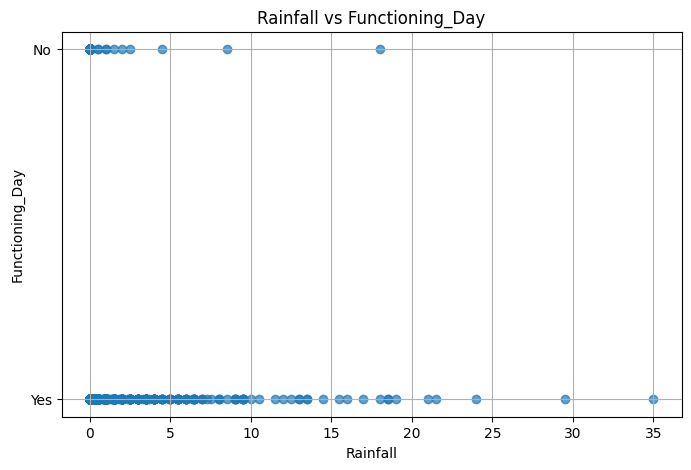

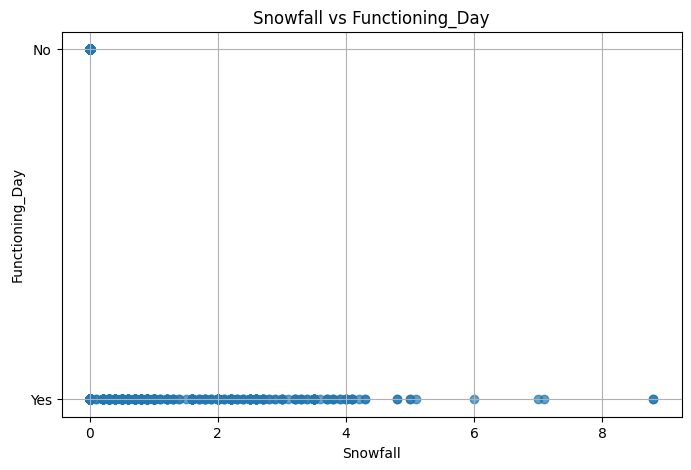

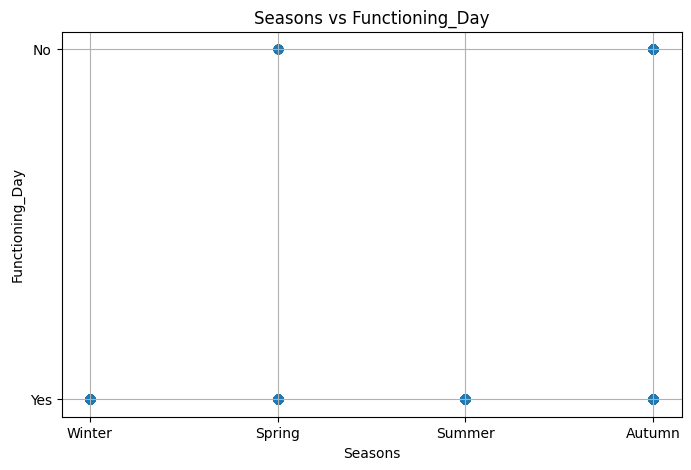

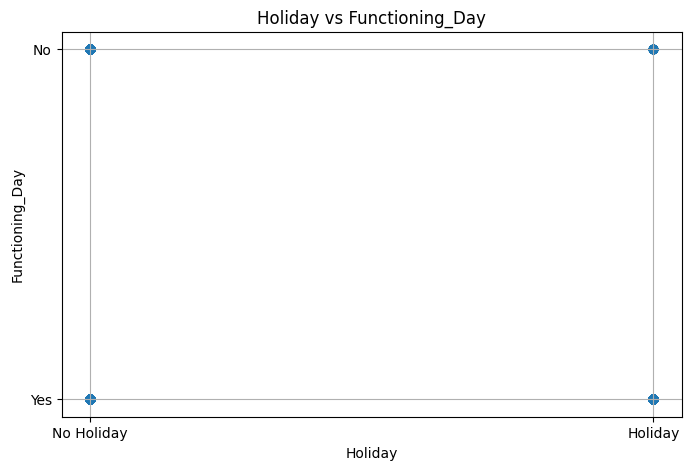

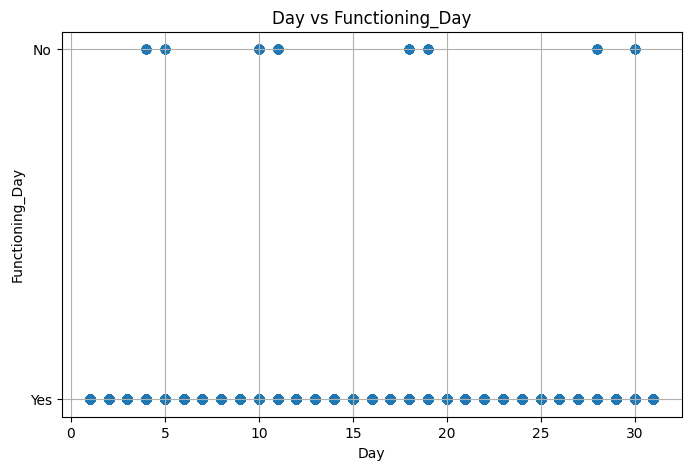

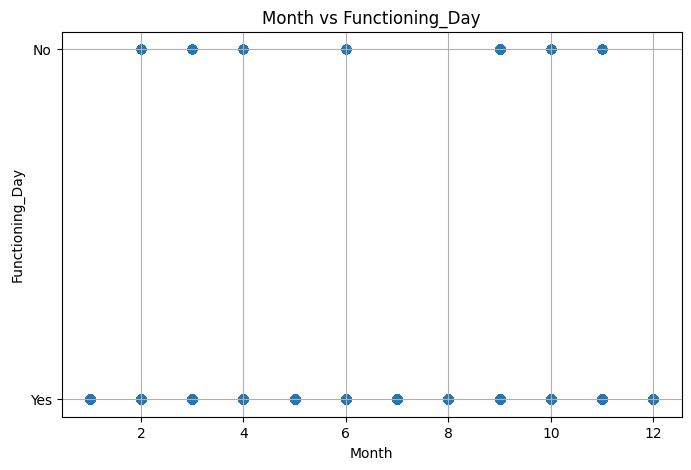

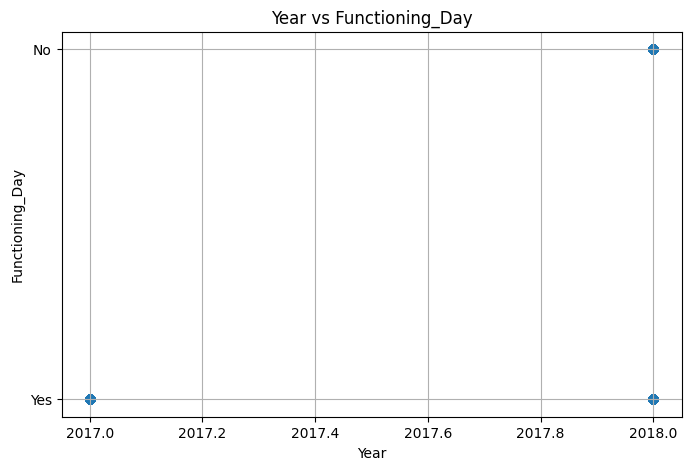

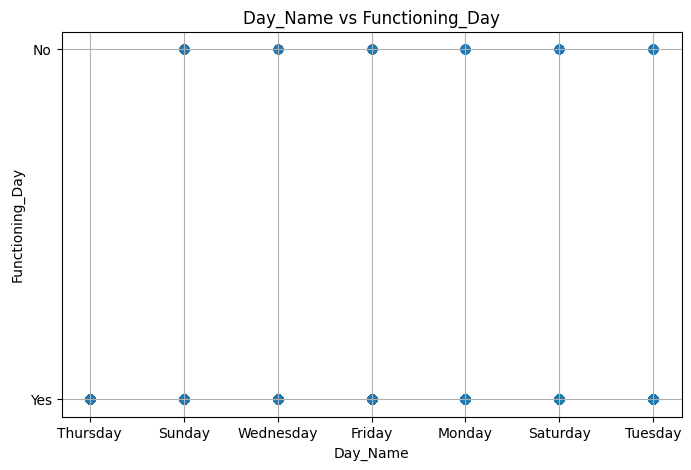

In [462]:
import matplotlib.pyplot as plt

for i in df.columns:
    if i == "Functioning_Day":  # for prevent "Functioning Day"'s itself comparison
        continue
    column = [i, "Functioning_Day"]


    combineddf = df[column]

    #Scatter
    plt.figure(figsize=(8, 5))
    plt.scatter(combineddf[i], combineddf["Functioning_Day"], alpha=0.7)
    plt.title(f"{i} vs Functioning_Day")
    plt.xlabel(i)
    plt.ylabel("Functioning_Day")
    plt.grid(True)
    plt.show()





Although my "Target(y)" value is "Rented_Bike_Count" The pairwise comparison of the Functional Day value with each value showed us that there is a direct relationship with some values ​​and no direct relationship with others. For example, our first graph tells us that there are some days when there is no transaction, and we can investigate this issue more deeply by expanding our analysis processes. Again, the seasonal comparison graph shows that these days when there is no transaction are in the "Spring" and "Fall" seasons. However, we see that the weather conditions are not a very determining factor at the first stage, at least for now. So we can move from the general to the specific. Let's see how the bike rental situation is by season, month and day.

# **Now let's examine the relationships between my dependent(y) variable "Rented_Bike_Count" and each independent variable and see if I can catch some insight from past for future**

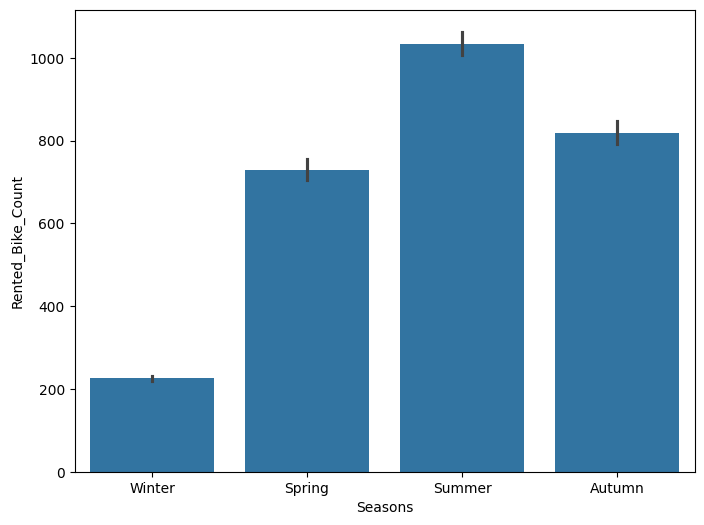

In [463]:
plt.figure(figsize = (8,6))
sns.barplot(x = "Seasons" , y = "Rented_Bike_Count", data=df)
plt.show()

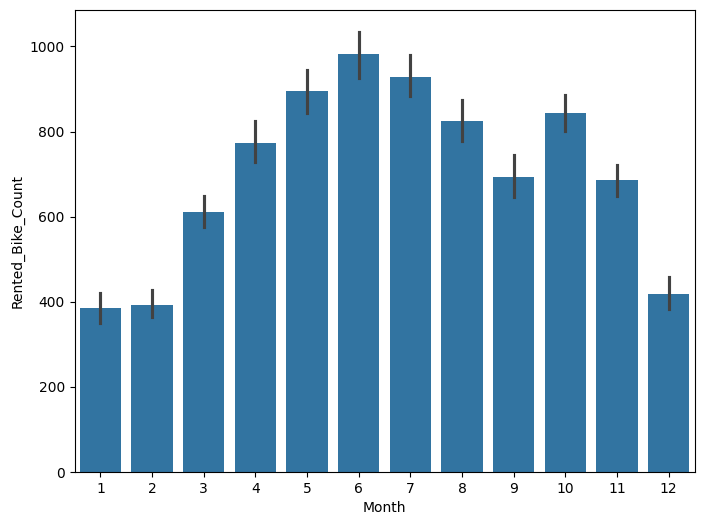

In [464]:
plt.figure(figsize=(8,6))
sns.barplot(x = "Month", y="Rented_Bike_Count", data=df)
plt.show()

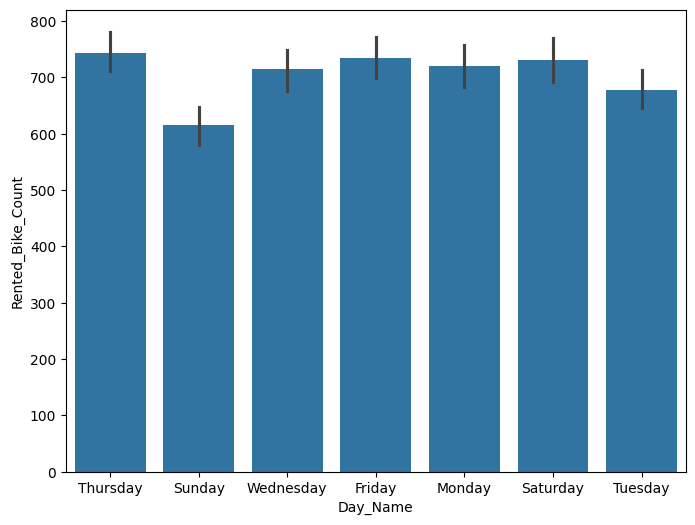

In [465]:
plt.figure(figsize=(8,6))
sns.barplot(x="Day_Name", y="Rented_Bike_Count", data=df)
plt.show()

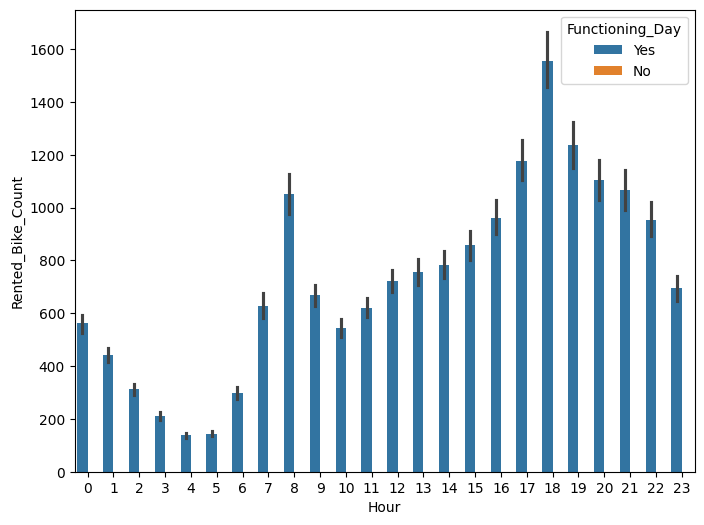

In [466]:
plt.figure(figsize=(8,6))
sns.barplot(x = "Hour", y="Rented_Bike_Count", hue="Functioning_Day",data=df)
plt.show()

# **From the last graph i saw that there is no bike rent on non functioning day in other words if it is functioning day there is exactly at least one bike renting**

In [467]:
df[["Rainfall", "Visibility","Snowfall","Solar_Radiation"]]

,Rainfall,Visibility,Snowfall,Solar_Radiation
0,0.0,2000,0.0,0.0
1,0.0,2000,0.0,0.0
2,0.0,2000,0.0,0.0
3,0.0,2000,0.0,0.0
4,0.0,2000,0.0,0.0
...,...,...,...,...
8755,0.0,1894,0.0,0.0
8756,0.0,2000,0.0,0.0
8757,0.0,1968,0.0,0.0
8758,0.0,1859,0.0,0.0


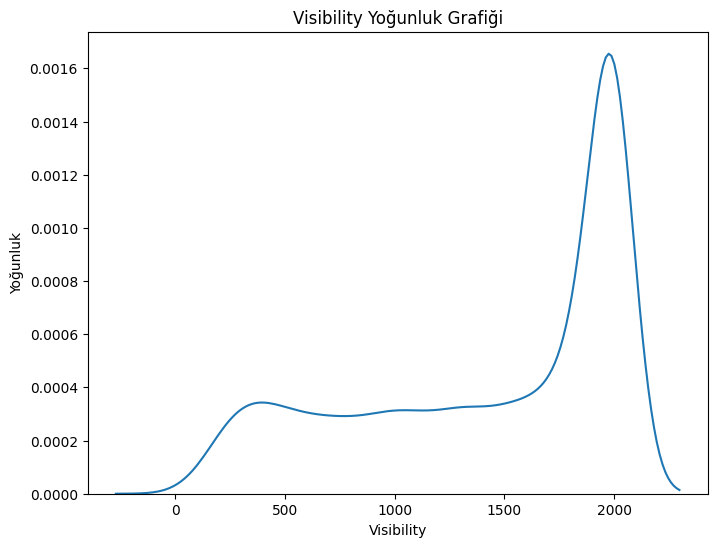

In [468]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Visibility'])
plt.title('Visibility Yoğunluk Grafiği')
plt.xlabel('Visibility')
plt.ylabel('Yoğunluk')
plt.show()

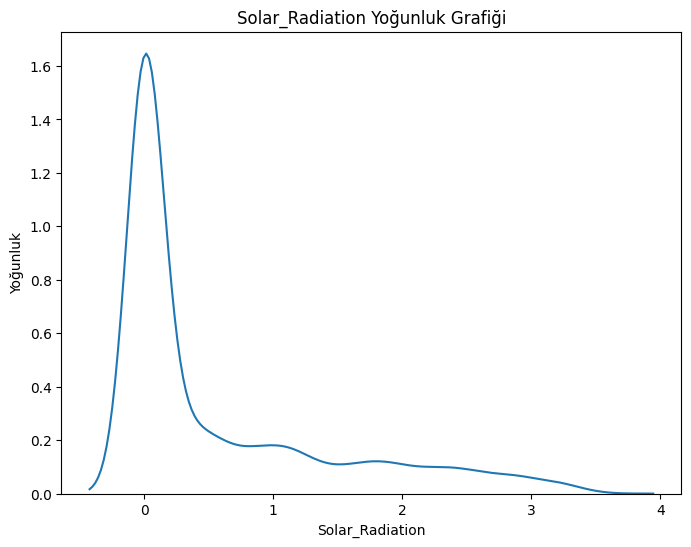

In [469]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Solar_Radiation'])
plt.title('Solar_Radiation Yoğunluk Grafiği')
plt.xlabel('Solar_Radiation')
plt.ylabel('Yoğunluk')
plt.show()

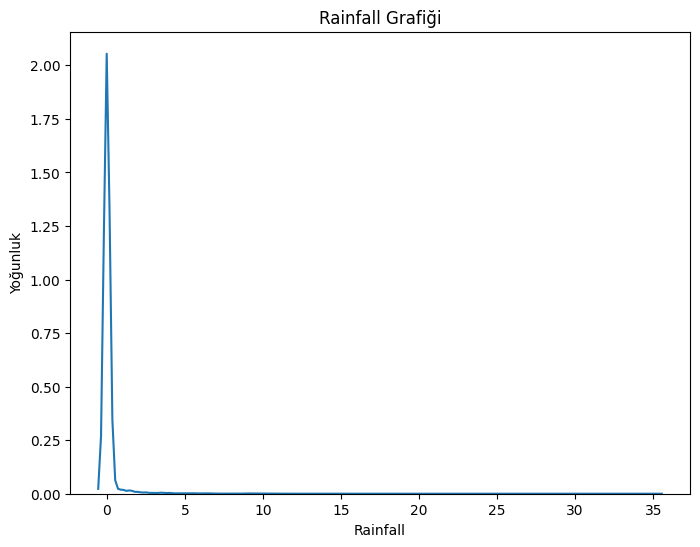

In [470]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Rainfall'])
plt.title('Rainfall Grafiği')
plt.xlabel('Rainfall')
plt.ylabel('Yoğunluk')
plt.show()

In [471]:
print(df["Rainfall"].mean())
print(df["Visibility"].mean())
print(df["Snowfall"].mean())
print(df["Solar_Radiation"].mean())

0.14868721461187215
1436.825799086758
0.07506849315068494
0.5691107305936072


# **I have determined a reference for the above values ​​so that those with nominal or ordinal values ​​​​become categorical reference points depending on these references. I can also make comparisons according to this point.**

In [472]:
df["isVisible"] = df["Visibility"].apply(lambda x: 1 if x > df["Visibility"].mean() else 0)
df["Rainfall(mm)"] = df["Rainfall"].apply(lambda x: 1 if x > df["Rainfall"].mean() else 0)
df["Snowfall(cm)"] = df["Snowfall"].apply(lambda x: 1 if x > df["Snowfall"].mean() else 0)
df["Solar_Radiation(MJ/m2)"] = df["Solar_Radiation"].apply(lambda x: 1 if x > df["Solar_Radiation"].mean() else 0)
df


,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,DPT,Solar_Radiation,Rainfall,...,Holiday,Functioning_Day,Day,Month,Year,Day_Name,isVisible,Rainfall(mm),Snowfall(cm),Solar_Radiation(MJ/m2)
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,No Holiday,Yes,12,1,2017,Thursday,1,0,0,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,No Holiday,Yes,12,1,2017,Thursday,1,0,0,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,No Holiday,Yes,12,1,2017,Thursday,1,0,0,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,No Holiday,Yes,12,1,2017,Thursday,1,0,0,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,No Holiday,Yes,12,1,2017,Thursday,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,...,No Holiday,Yes,30,11,2018,Friday,1,0,0,0
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,...,No Holiday,Yes,30,11,2018,Friday,1,0,0,0
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,...,No Holiday,Yes,30,11,2018,Friday,1,0,0,0
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,...,No Holiday,Yes,30,11,2018,Friday,1,0,0,0


In [473]:
df.drop(["Visibility","Rainfall","Snowfall","Humidity","Solar_Radiation"],axis=1,inplace=True)

In [474]:
df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Wind_speed,DPT,Seasons,Holiday,Functioning_Day,Day,Month,Year,Day_Name,isVisible,Rainfall(mm),Snowfall(cm),Solar_Radiation(MJ/m2)
0,2017-01-12,254,0,-5.2,2.2,-17.6,Winter,No Holiday,Yes,12,1,2017,Thursday,1,0,0,0
1,2017-01-12,204,1,-5.5,0.8,-17.6,Winter,No Holiday,Yes,12,1,2017,Thursday,1,0,0,0
2,2017-01-12,173,2,-6.0,1.0,-17.7,Winter,No Holiday,Yes,12,1,2017,Thursday,1,0,0,0
3,2017-01-12,107,3,-6.2,0.9,-17.6,Winter,No Holiday,Yes,12,1,2017,Thursday,1,0,0,0
4,2017-01-12,78,4,-6.0,2.3,-18.6,Winter,No Holiday,Yes,12,1,2017,Thursday,1,0,0,0


In [475]:
df["isHoliday"] = df["Holiday"].apply(lambda x: 1 if x == "Holiday" else 0)
df = df.drop("Holiday" , axis = 1)
df

,Date,Rented_Bike_Count,Hour,Temperature,Wind_speed,DPT,Seasons,Functioning_Day,Day,Month,Year,Day_Name,isVisible,Rainfall(mm),Snowfall(cm),Solar_Radiation(MJ/m2),isHoliday
0,2017-01-12,254,0,-5.2,2.2,-17.6,Winter,Yes,12,1,2017,Thursday,1,0,0,0,0
1,2017-01-12,204,1,-5.5,0.8,-17.6,Winter,Yes,12,1,2017,Thursday,1,0,0,0,0
2,2017-01-12,173,2,-6.0,1.0,-17.7,Winter,Yes,12,1,2017,Thursday,1,0,0,0,0
3,2017-01-12,107,3,-6.2,0.9,-17.6,Winter,Yes,12,1,2017,Thursday,1,0,0,0,0
4,2017-01-12,78,4,-6.0,2.3,-18.6,Winter,Yes,12,1,2017,Thursday,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,2.6,-10.3,Autumn,Yes,30,11,2018,Friday,1,0,0,0,0
8756,2018-11-30,764,20,3.4,2.3,-9.9,Autumn,Yes,30,11,2018,Friday,1,0,0,0,0
8757,2018-11-30,694,21,2.6,0.3,-9.9,Autumn,Yes,30,11,2018,Friday,1,0,0,0,0
8758,2018-11-30,712,22,2.1,1.0,-9.8,Autumn,Yes,30,11,2018,Friday,1,0,0,0,0


In [476]:
df.Functioning_Day.value_counts()

,count
Functioning_Day,
Yes,8465
No,295


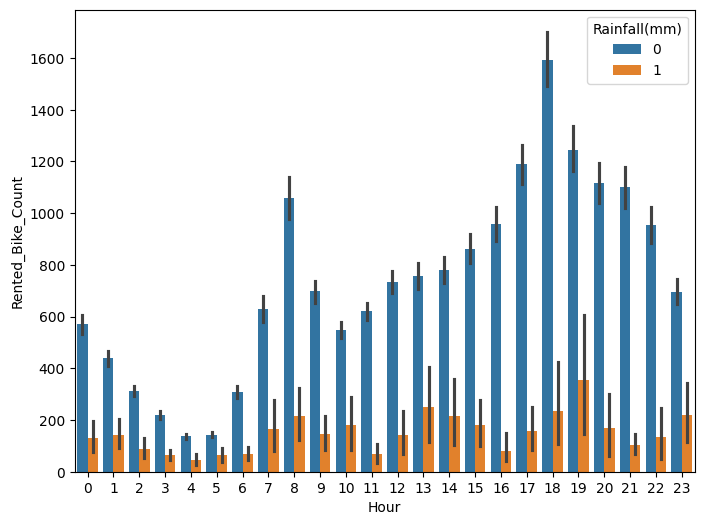

In [477]:
plt.figure(figsize=(8,6))
sns.barplot(x = "Hour", y="Rented_Bike_Count", hue="Rainfall(mm)",data=df)
plt.show()

## The above graph illustrates the impact of rainfall on bike rentals across different hours of the day. Using hue="Rainfall(mm)", the bar plot distinguishes between rainy days (1) and non-rainy days (0). Overall, bike rentals are significantly higher on non-rainy days (blue bars) compared to rainy days (orange bars) across all hours. This difference is particularly pronounced during peak commuting hours (7-9 am and 5-7 pm). While rentals are lower on rainy days, the hourly pattern still exists, albeit with less pronounced peaks and troughs. This suggests that rainfall is a major factor influencing bike rental decisions, with people generally avoiding rentals during rainy periods.

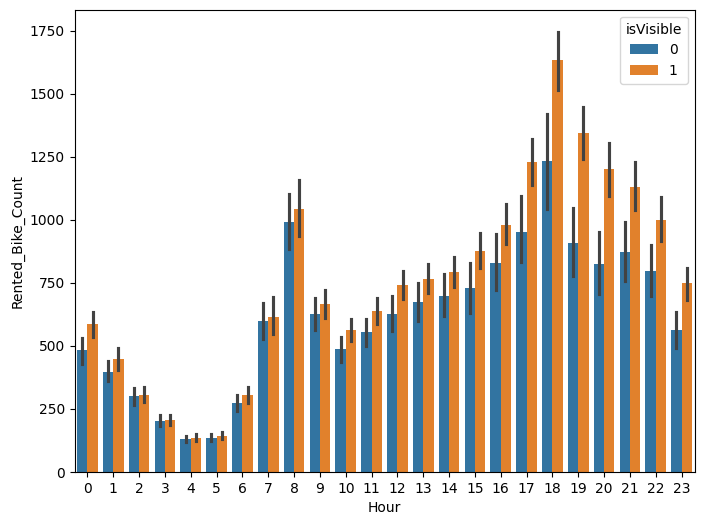

In [478]:
plt.figure(figsize=(8,6))
sns.barplot(x = "Hour", y="Rented_Bike_Count", hue="isVisible",data=df)
plt.show()

## This above graph demonstrates the relationship between visibility (isVisibility) and hourly bike rentals (Rented Bike Count). The hue="isVisibility" parameter differentiates between low visibility conditions (0, less than 1436(mean) meters) and high visibility conditions (1, 1436(mean) meters or greater) using different colored bars. The graph reveals that bike rentals are generally higher during periods of high visibility (orange bars), particularly during daylight hours and peak commuting times. Conversely, rentals tend to be lower when visibility is poor (blue bars). This suggests that people prefer to rent bikes when visibility is good, possibly due to safety concerns or a more enjoyable riding experience. However, even during periods of low visibility, there is still a noticeable demand during commuting hours, indicating that some individuals may rely on bikes regardless of weather conditions or have limited alternative transportation options.

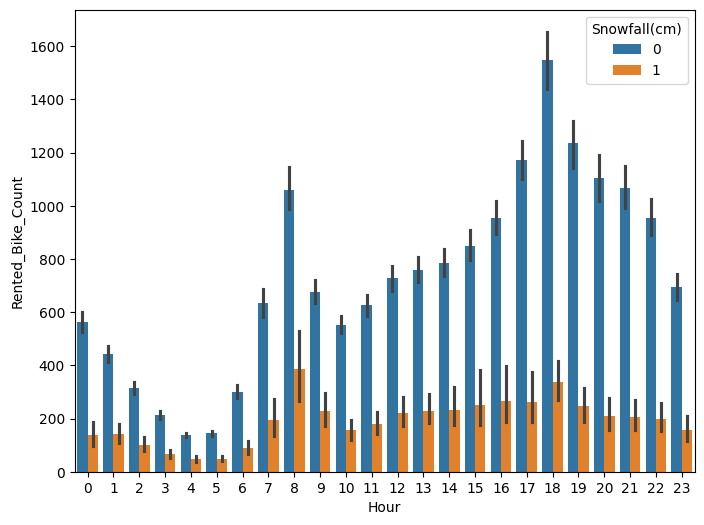

In [479]:
plt.figure(figsize=(8,6))
sns.barplot(x = "Hour", y="Rented_Bike_Count", hue="Snowfall(cm)",data=df)
plt.show()

## This graph illustrates the impact of snowfall (Snowfall) on hourly bike rentals (Rented Bike Count). The hue="Snowfall(cm)" parameter differentiates between times with less than 0.075 cm of snowfall (0) and times with 0.075 cm or more (1) using different colored bars. As clearly shown in the graph, bike rentals are considerably higher when there is no snowfall (blue bars) compared to when there is snowfall (orange bars). This pattern holds true across all hours, but the difference is particularly pronounced during peak commuting hours (morning and evening). Snowfall appears to be a significant deterrent to bike rentals.

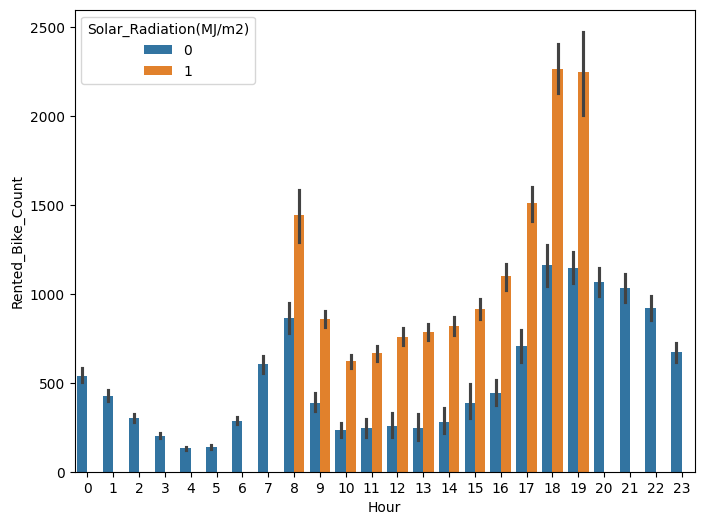

In [480]:
plt.figure(figsize=(8,6))
sns.barplot(x = "Hour", y="Rented_Bike_Count", hue="Solar_Radiation(MJ/m2)",data=df)
plt.show()

## This above graph illustrates the impact of solar radiation (Solar_Radiation) on hourly bike rentals (Rented_Bike_Count). The data is divided into two groups based on solar radiation levels: 0 representing lower solar radiation (<0.57 MJ/m2) and 1 representing higher solar radiation (>=0.57 MJ/m2). Notably, between 8:00 and 18:00, the number of rentals is generally higher when solar radiation is high (orange bars) compared to when it's low (blue bars), suggesting people are more inclined to rent bikes in sunny conditions. This difference diminishes during the early morning and late evening hours, indicating that other factors like temperature or rainfall might play a more significant role during those times.

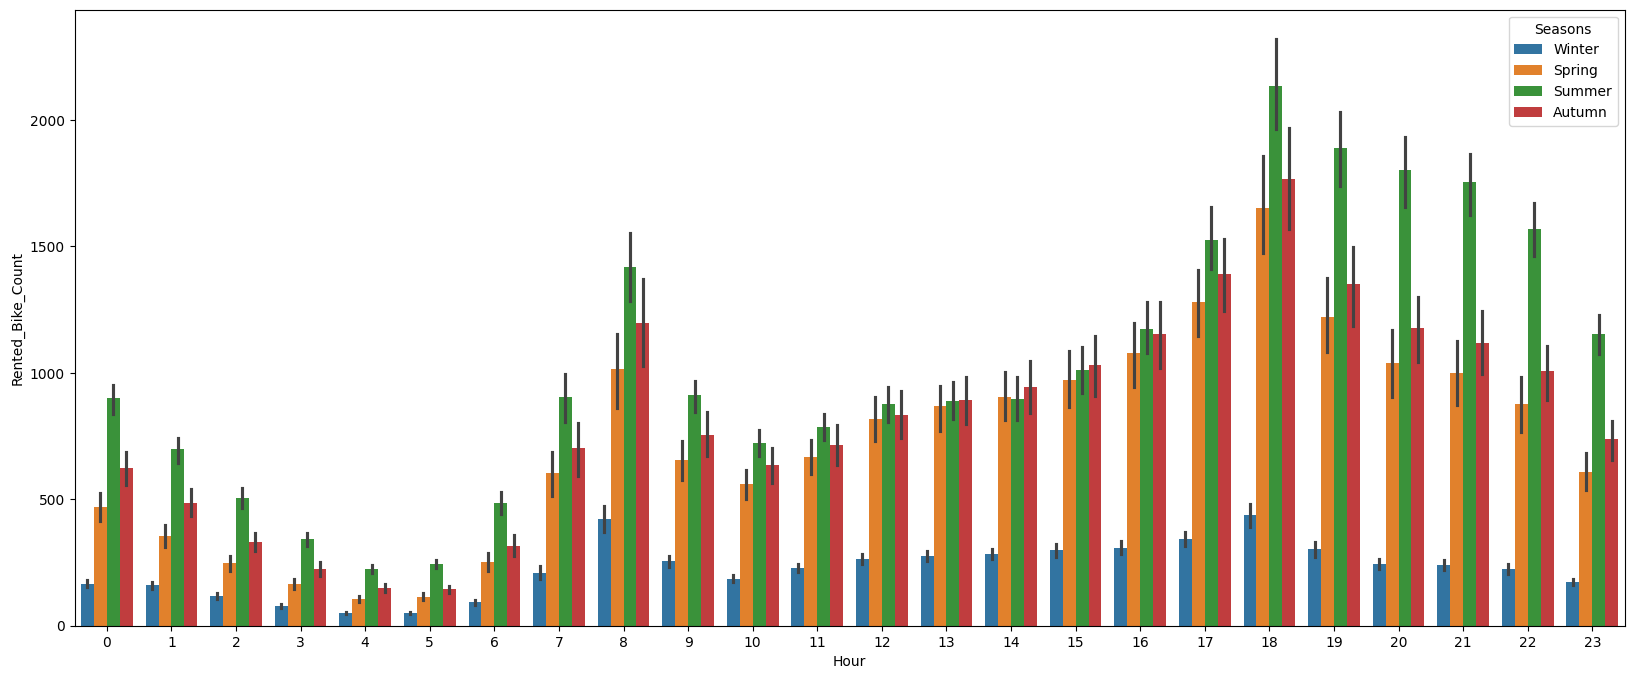

In [481]:
plt.figure(figsize=(20,8))
sns.barplot(x = "Hour", y="Rented_Bike_Count", hue="Seasons",data=df)
plt.show()

## This graph presents the distribution of hourly bike rentals (Rented_Bike_Count) across different seasons (Seasons). Each hour is represented by a set of bars, one for each season. Summer (green bars) shows significantly higher rental counts compared to other seasons. Spring and autumn exhibit moderate rental activity, while winter (blue bars) has the lowest rental counts. Additionally, within each season, there's a noticeable increase in rentals during commuting hours (morning and evening). The graph clearly demonstrates the substantial influence of seasonality and time of day on bike rental patterns.

In [482]:
df.isnull().sum()

,0
Date,0
Rented_Bike_Count,0
Hour,0
Temperature,0
Wind_speed,0
DPT,0
Seasons,0
Functioning_Day,0
Day,0
Month,0


In [483]:
#i don't need non functioning days.
df = df[df["Functioning_Day"] == "Yes"]
df

,Date,Rented_Bike_Count,Hour,Temperature,Wind_speed,DPT,Seasons,Functioning_Day,Day,Month,Year,Day_Name,isVisible,Rainfall(mm),Snowfall(cm),Solar_Radiation(MJ/m2),isHoliday
0,2017-01-12,254,0,-5.2,2.2,-17.6,Winter,Yes,12,1,2017,Thursday,1,0,0,0,0
1,2017-01-12,204,1,-5.5,0.8,-17.6,Winter,Yes,12,1,2017,Thursday,1,0,0,0,0
2,2017-01-12,173,2,-6.0,1.0,-17.7,Winter,Yes,12,1,2017,Thursday,1,0,0,0,0
3,2017-01-12,107,3,-6.2,0.9,-17.6,Winter,Yes,12,1,2017,Thursday,1,0,0,0,0
4,2017-01-12,78,4,-6.0,2.3,-18.6,Winter,Yes,12,1,2017,Thursday,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,2.6,-10.3,Autumn,Yes,30,11,2018,Friday,1,0,0,0,0
8756,2018-11-30,764,20,3.4,2.3,-9.9,Autumn,Yes,30,11,2018,Friday,1,0,0,0,0
8757,2018-11-30,694,21,2.6,0.3,-9.9,Autumn,Yes,30,11,2018,Friday,1,0,0,0,0
8758,2018-11-30,712,22,2.1,1.0,-9.8,Autumn,Yes,30,11,2018,Friday,1,0,0,0,0


In [484]:
Seasons=pd.get_dummies(df['Seasons'],drop_first=True).astype(int)
Seasons

,Spring,Summer,Winter
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
8755,0,0,0
8756,0,0,0
8757,0,0,0
8758,0,0,0


In [485]:
updated_dataframe = pd.concat([df, Seasons], axis=1)
updated_dataframe
updated_dataframe.drop("Seasons",axis=1,inplace=True)
updated_dataframe

,Date,Rented_Bike_Count,Hour,Temperature,Wind_speed,DPT,Functioning_Day,Day,Month,Year,Day_Name,isVisible,Rainfall(mm),Snowfall(cm),Solar_Radiation(MJ/m2),isHoliday,Spring,Summer,Winter
0,2017-01-12,254,0,-5.2,2.2,-17.6,Yes,12,1,2017,Thursday,1,0,0,0,0,0,0,1
1,2017-01-12,204,1,-5.5,0.8,-17.6,Yes,12,1,2017,Thursday,1,0,0,0,0,0,0,1
2,2017-01-12,173,2,-6.0,1.0,-17.7,Yes,12,1,2017,Thursday,1,0,0,0,0,0,0,1
3,2017-01-12,107,3,-6.2,0.9,-17.6,Yes,12,1,2017,Thursday,1,0,0,0,0,0,0,1
4,2017-01-12,78,4,-6.0,2.3,-18.6,Yes,12,1,2017,Thursday,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,2.6,-10.3,Yes,30,11,2018,Friday,1,0,0,0,0,0,0,0
8756,2018-11-30,764,20,3.4,2.3,-9.9,Yes,30,11,2018,Friday,1,0,0,0,0,0,0,0
8757,2018-11-30,694,21,2.6,0.3,-9.9,Yes,30,11,2018,Friday,1,0,0,0,0,0,0,0
8758,2018-11-30,712,22,2.1,1.0,-9.8,Yes,30,11,2018,Friday,1,0,0,0,0,0,0,0


In [486]:
updated_dataframe.isnull().sum()

,0
Date,0
Rented_Bike_Count,0
Hour,0
Temperature,0
Wind_speed,0
DPT,0
Functioning_Day,0
Day,0
Month,0
Year,0


<Axes: >

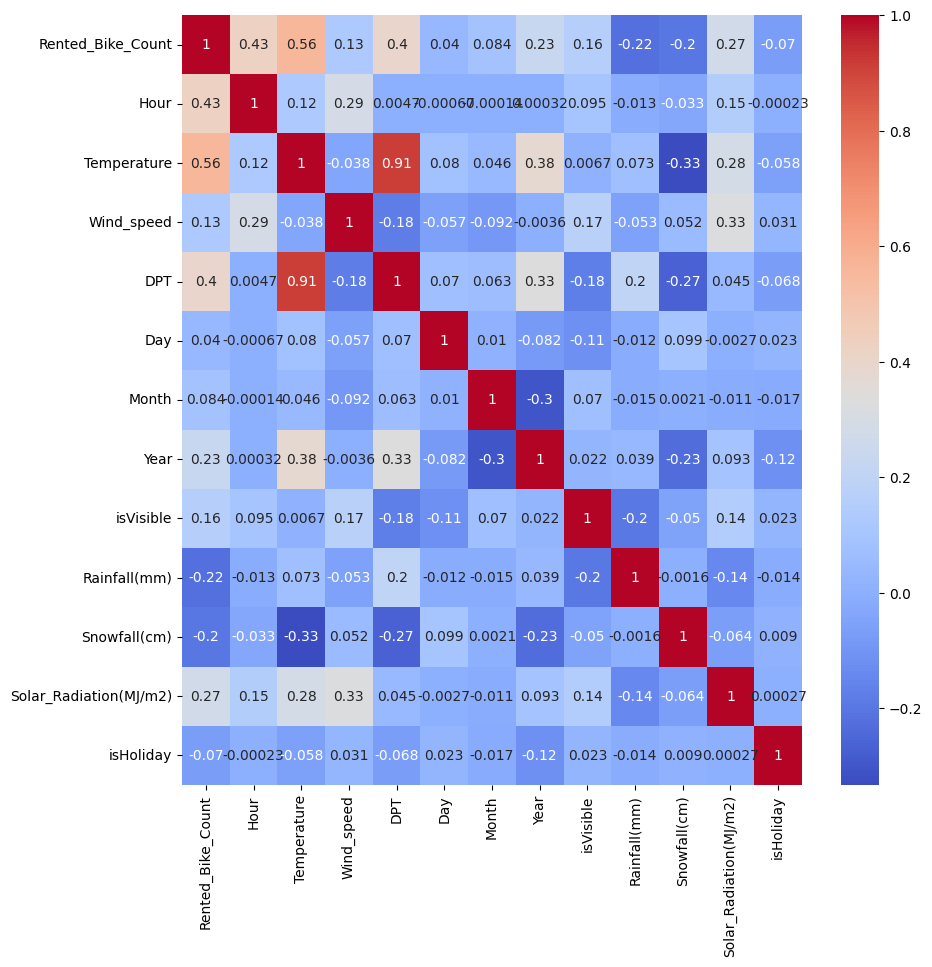

In [487]:
plt.figure(figsize = (10,10))
numericalDataFrame = df.select_dtypes(include=np.number)
sns.heatmap(numericalDataFrame.corr(), annot = True, cmap = "coolwarm")

# ***I've checked correlation between Rented_Bike_Count and the other numeric values before creating my machine learning model sets. According to my research, if there is too much correlation, I may not include it in my set, so I can avoid the risk of data leakage.I realized that there is no risk involved.***

In [488]:
X = updated_dataframe.drop(["Rented_Bike_Count", "Date"], axis=1) #I chose not to include the "date" value. Historical values ​​can create distortions
y= updated_dataframe["Rented_Bike_Count"]

In [489]:
def predict(ml_model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=12)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    model = ml_model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Grafik çizimi
    plt.scatter(y_pred, y_test, color='b')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Ek bilgiler
    overlay = (
        f'R^2 is {model.score(X_test, y_test):.2f}\n'
        f'Adj R^2 is {1 - (1 - model.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1):.2f}\n'
        f'RMSE is: {mean_squared_error(y_test, y_pred, squared=False):.2f}'
    )
    plt.annotate(text=overlay, xy=(0, 2500), size='x-large')

In [490]:
# Functioning_Day sütununu sayısal hale getirme
X["Functioning_Day"] = X["Functioning_Day"].map({"Yes": 1, "No": 0}).astype(int)

# Day_Name gibi metin içeren sütunları dummies ile dönüştürme
X = pd.get_dummies(X, columns=["Day_Name"], drop_first=True)


In [491]:
print(X.dtypes)

Hour                        int64
Temperature               float64
Wind_speed                float64
DPT                       float64
Functioning_Day             int64
Day                         int32
Month                       int32
Year                        int32
isVisible                   int64
Rainfall(mm)                int64
Snowfall(cm)                int64
Solar_Radiation(MJ/m2)      int64
isHoliday                   int64
Spring                      int64
Summer                      int64
Winter                      int64
Day_Name_Monday              bool
Day_Name_Saturday            bool
Day_Name_Sunday              bool
Day_Name_Thursday            bool
Day_Name_Tuesday             bool
Day_Name_Wednesday           bool
dtype: object


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


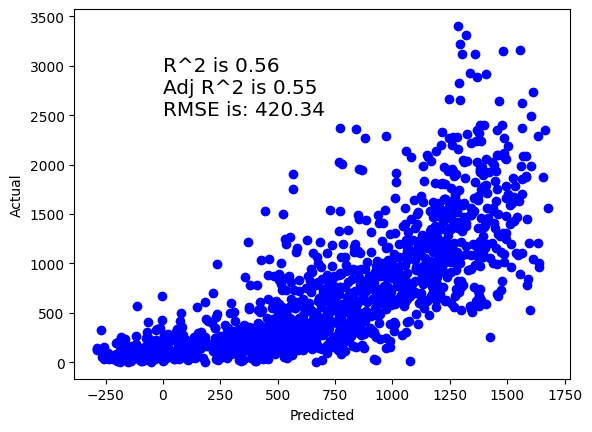

In [492]:
# Modeli çalıştır
predict(LinearRegression(), X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


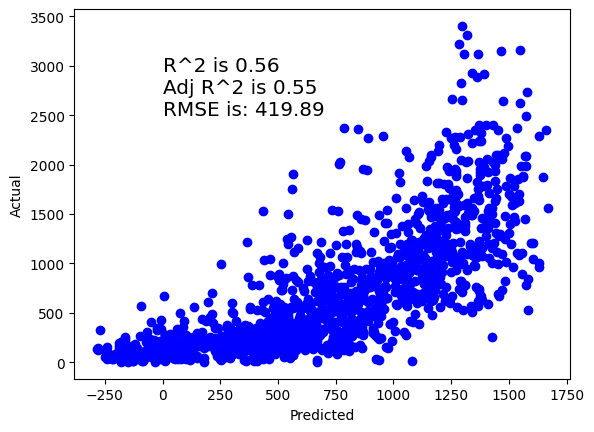

In [493]:
predict(Lasso(),X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


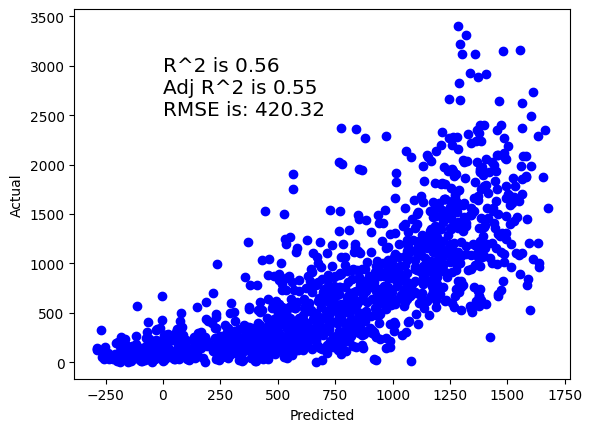

In [494]:
predict(Ridge(),X,y)